In [4]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import plotly.express as px

In [71]:
fichierCSVEntree = "http://factominer.free.fr/book/temperature.csv"
tempDataFrame = pd.read_csv(fichierCSVEntree, sep=";", index_col=0, encoding="utf-8")
tempDataFrame.head()

,January,February,March,April,May,June,July,August,September,October,November,December,Annual,Amplitude,Latitude,Longitude,Area
Amsterdam,2.9,2.5,5.7,8.2,12.5,14.8,17.1,17.1,14.5,11.4,7.0,4.4,9.9,14.6,52.2,4.5,West
Athens,9.1,9.7,11.7,15.4,20.1,24.5,27.4,27.2,23.8,19.2,14.6,11.0,17.8,18.3,37.6,23.5,South
Berlin,-0.2,0.1,4.4,8.2,13.8,16.0,18.3,18.0,14.4,10.0,4.2,1.2,9.1,18.5,52.3,13.2,West
Brussels,3.3,3.3,6.7,8.9,12.8,15.6,17.8,17.8,15.0,11.1,6.7,4.4,10.3,14.4,50.5,4.2,West
Budapest,-1.1,0.8,5.5,11.6,17.0,20.2,22.0,21.3,16.9,11.3,5.1,0.7,10.9,23.1,47.3,19.0,East


In [72]:
print(tempDataFrame.index)

Index(['Amsterdam ', 'Athens ', 'Berlin ', 'Brussels', 'Budapest ',
       'Copenhagen ', 'Dublin ', 'Elsinki', 'Kiev ', 'Krakow ', 'Lisbon ',
       'London ', 'Madrid ', 'Minsk ', 'Moscow', 'Oslo ', 'Paris ', 'Prague ',
       'Reykjavik ', 'Rome ', 'Sarajevo ', 'Sofia ', 'Stockholm ', 'Antwerp ',
       'Barcelona ', 'Bordeaux ', 'Edinburgh ', 'Frankfurt ', 'Geneva ',
       'Genoa ', 'Milan ', 'Palermo ', 'Seville ', 'St. Petersburg ',
       'Zurich '],
      dtype='object')


In [73]:
tempDataFrame.loc[tempDataFrame.index[0]]

January       2.9
February      2.5
March         5.7
April         8.2
May          12.5
June         14.8
July         17.1
August       17.1
September    14.5
October      11.4
November        7
December      4.4
Annual        9.9
Amplitude    14.6
Latitude     52.2
Longitude     4.5
Area         West
Name: Amsterdam , dtype: object

In [75]:
tempDataFrame.loc['Amsterdam ']

January       2.9
February      2.5
March         5.7
April         8.2
May          12.5
June         14.8
July         17.1
August       17.1
September    14.5
October      11.4
November        7
December      4.4
Annual        9.9
Amplitude    14.6
Latitude     52.2
Longitude     4.5
Area         West
Name: Amsterdam , dtype: object

In [34]:
print(tempDataFrame['January'])

Amsterdam           2.9
Athens              9.1
Berlin             -0.2
Brussels            3.3
Budapest           -1.1
Copenhagen         -0.4
Dublin              4.8
Elsinki            -5.8
Kiev               -5.9
Krakow             -3.7
Lisbon             10.5
London              3.4
Madrid              5.0
Minsk              -6.9
Moscow             -9.3
Oslo               -4.3
Paris               3.7
Prague             -1.3
Reykjavik          -0.3
Rome                7.1
Sarajevo           -1.4
Sofia              -1.7
Stockholm          -3.5
Antwerp             3.1
Barcelona           9.1
Bordeaux            5.6
Edinburgh           2.9
Frankfurt           0.2
Geneva              0.1
Genoa               8.7
Milan               1.1
Palermo            10.5
Seville            10.7
St. Petersburg     -8.2
Zurich             -0.7
Name: January, dtype: float64


In [37]:
tempDataFrame.January

Amsterdam           2.9
Athens              9.1
Berlin             -0.2
Brussels            3.3
Budapest           -1.1
Copenhagen         -0.4
Dublin              4.8
Elsinki            -5.8
Kiev               -5.9
Krakow             -3.7
Lisbon             10.5
London              3.4
Madrid              5.0
Minsk              -6.9
Moscow             -9.3
Oslo               -4.3
Paris               3.7
Prague             -1.3
Reykjavik          -0.3
Rome                7.1
Sarajevo           -1.4
Sofia              -1.7
Stockholm          -3.5
Antwerp             3.1
Barcelona           9.1
Bordeaux            5.6
Edinburgh           2.9
Frankfurt           0.2
Geneva              0.1
Genoa               8.7
Milan               1.1
Palermo            10.5
Seville            10.7
St. Petersburg     -8.2
Zurich             -0.7
Name: January, dtype: float64

In [38]:
tempDataFrame[0:3]

,January,February,March,April,May,June,July,August,September,October,November,December,Annual,Amplitude,Latitude,Longitude,Area
Amsterdam,2.9,2.5,5.7,8.2,12.5,14.8,17.1,17.1,14.5,11.4,7.0,4.4,9.9,14.6,52.2,4.5,West
Athens,9.1,9.7,11.7,15.4,20.1,24.5,27.4,27.2,23.8,19.2,14.6,11.0,17.8,18.3,37.6,23.5,South
Berlin,-0.2,0.1,4.4,8.2,13.8,16.0,18.3,18.0,14.4,10.0,4.2,1.2,9.1,18.5,52.3,13.2,West


In [47]:
tempDataFrame.loc[tempDataFrame.index[0]]

January       2.9
February      2.5
March         5.7
April         8.2
May          12.5
June         14.8
July         17.1
August       17.1
September    14.5
October      11.4
November        7
December      4.4
Annual        9.9
Amplitude    14.6
Latitude     52.2
Longitude     4.5
Area         West
Name: Amsterdam , dtype: object

In [58]:
tempDataFrame.iloc[0]

January       2.9
February      2.5
March         5.7
April         8.2
May          12.5
June         14.8
July         17.1
August       17.1
September    14.5
October      11.4
November        7
December      4.4
Annual        9.9
Amplitude    14.6
Latitude     52.2
Longitude     4.5
Area         West
Name: Amsterdam , dtype: object

In [49]:
tempDataFrame['March'][tempDataFrame['March']>10]

Athens        11.7
Lisbon        12.8
Rome          10.5
Barcelona     11.8
Genoa         11.4
Palermo       13.3
Seville       14.1
Name: March, dtype: float64

In [57]:
tempDataFrame['March'].iloc[0]

5.7

In [ ]:
tempDataFrame['March']

In [35]:
print(tempDataFrame.columns)

Index(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December', 'Annual',
       'Amplitude', 'Latitude', 'Longitude', 'Area'],
      dtype='object')


In [36]:
tempDataFrame.describe()

,January,February,March,April,May,June,July,August,September,October,November,December,Annual,Amplitude,Latitude,Longitude
count,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000
mean,1.345714,2.217143,5.228571,9.282857,13.911429,17.414286,19.622857,18.980000,15.631429,11.002857,6.065714,2.880000,10.265714,18.317143,49.042857,13.011429
std,5.502157,5.498956,4.863040,3.806456,3.273582,3.320271,3.574673,3.727939,4.109728,4.323226,4.566820,4.967411,3.963061,4.505649,7.103284,9.697021
min,-9.300000,-7.900000,-3.700000,2.900000,6.500000,9.300000,11.100000,10.600000,7.900000,4.500000,-1.100000,-6.000000,4.500000,10.200000,37.200000,0.000000
25%,-1.550000,-0.150000,1.600000,7.250000,12.150000,15.400000,17.300000,16.650000,13.000000,8.650000,3.200000,0.250000,7.750000,14.900000,43.900000,5.050000
50%,0.200000,1.900000,5.400000,8.900000,13.800000,16.900000,18.900000,18.300000,14.800000,10.200000,5.100000,1.700000,9.700000,18.500000,50.000000,10.500000
75%,4.900000,5.800000,8.500000,12.050000,16.350000,19.800000,21.750000,21.600000,18.250000,13.300000,7.900000,5.400000,12.650000,21.450000,53.350000,19.300000
max,10.700000,11.800000,14.100000,16.900000,20.900000,24.500000,27.400000,27.200000,24.300000,19.400000,14.900000,12.000000,18.200000,27.600000,64.100000,37.600000


In [10]:
temperatures = tempDataFrame.iloc[:,0:12].to_numpy()
print(temperatures)

[[ 2.9  2.5  5.7  8.2 12.5 14.8 17.1 17.1 14.5 11.4  7.   4.4]
 [ 9.1  9.7 11.7 15.4 20.1 24.5 27.4 27.2 23.8 19.2 14.6 11. ]
 [-0.2  0.1  4.4  8.2 13.8 16.  18.3 18.  14.4 10.   4.2  1.2]
 [ 3.3  3.3  6.7  8.9 12.8 15.6 17.8 17.8 15.  11.1  6.7  4.4]
 [-1.1  0.8  5.5 11.6 17.  20.2 22.  21.3 16.9 11.3  5.1  0.7]
 [-0.4 -0.4  1.3  5.8 11.1 15.4 17.1 16.6 13.3  8.8  4.1  1.3]
 [ 4.8  5.   5.9  7.8 10.4 13.3 15.  14.6 12.7  9.7  6.7  5.4]
 [-5.8 -6.2 -2.7  3.1 10.2 14.  17.2 14.9  9.7  5.2  0.1 -2.3]
 [-5.9 -5.  -0.3  7.4 14.3 17.8 19.4 18.5 13.7  7.5  1.2 -3.6]
 [-3.7 -2.   1.9  7.9 13.2 16.9 18.4 17.6 13.7  8.6  2.6 -1.7]
 [10.5 11.3 12.8 14.5 16.7 19.4 21.5 21.9 20.4 17.4 13.7 11.1]
 [ 3.4  4.2  5.5  8.3 11.9 15.1 16.9 16.5 14.  10.2  6.3  4.4]
 [ 5.   6.6  9.4 12.2 16.  20.8 24.7 24.3 19.8 13.9  8.7  5.4]
 [-6.9 -6.2 -1.9  5.4 12.4 15.9 17.4 16.3 11.6  5.8  0.1 -4.2]
 [-9.3 -7.6 -2.   6.  13.  16.6 18.3 16.7 11.2  5.1 -1.1 -6. ]
 [-4.3 -3.8 -0.6  4.4 10.3 14.9 16.9 15.4 11.1  5.7  0.

CPU times: user 17.7 ms, sys: 0 ns, total: 17.7 ms
Wall time: 17.8 ms
intertie intra-classes :  613.3122380952382


<Figure size 1360x1120 with 0 Axes>

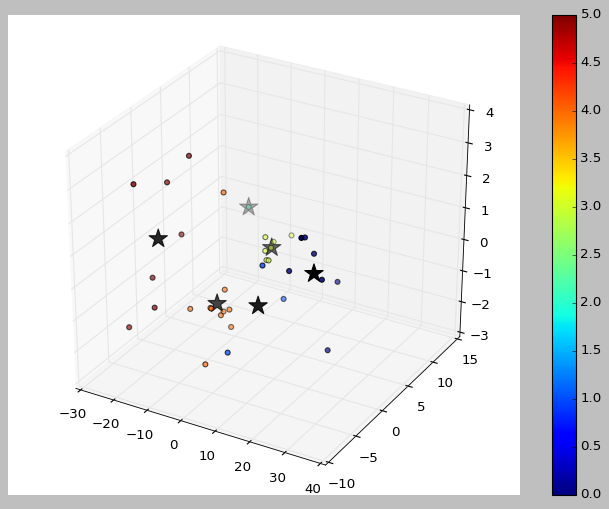

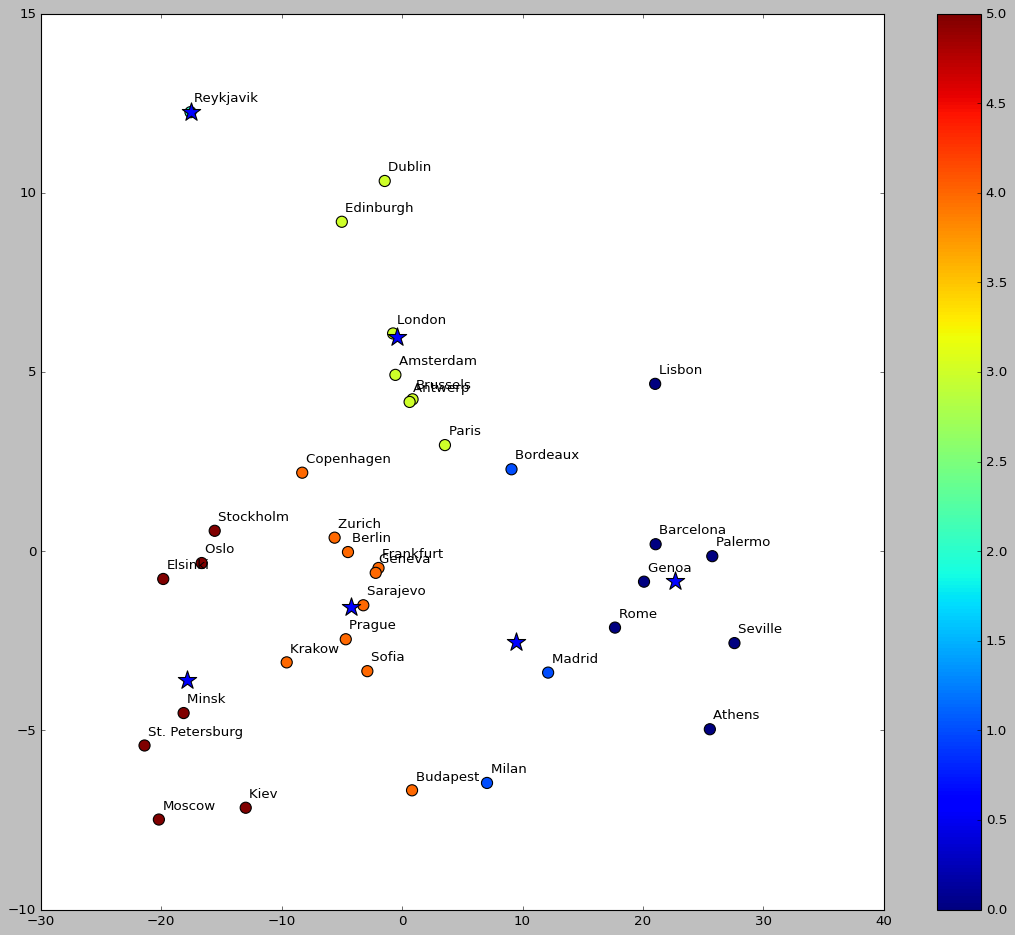

In [11]:
kmean_model = KMeans(n_clusters=6, n_init=10, max_iter=10, init="random")
%time km = kmean_model.fit_predict(temperatures)
print ("intertie intra-classes : ", kmean_model.inertia_)

pca = PCA(n_components=3).fit(temperatures)
data = pca.transform(temperatures)
centroids = pca.transform(kmean_model.cluster_centers_)

plt.figure(figsize=(17,14))
axis = Axes3D(plt.figure())
scatter = axis.scatter(data[:, 0], data[:, 1],data[:, 2],c = kmean_model.labels_)
axis.scatter(centroids[:, 0], centroids[:, 1], centroids[:,2], marker='*', s=300, c='#000000')
plt.colorbar(scatter)
plt.show()

plt.figure(figsize=(17,14))
plt.style.use("classic") #cf. https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html
scatter= plt.scatter(data[:, 0], data[:, 1],c = kmean_model.labels_, s=100)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=300)
for i, nom in enumerate(tempDataFrame.index):
    plt.text(data[i, 0]+0.3, data[i, 1]+0.3, nom)
plt.colorbar(scatter)
plt.show()


In [76]:
fig = px.scatter(tempDataFrame, x=tempDataFrame.index, y='January')
fig.show()

fig = px.scatter(tempDataFrame, x="March", y='Amplitude', color='Area', hover_name=tempDataFrame.index)
fig.show()

In [22]:
fig2 = px.scatter(tempDataFrame, x=tempDataFrame.index, y='January')
fig2.show()